In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn import tree
from sklearn import preprocessing
import seaborn as sns 

In [4]:
# Show the dataframe
df_heart = pd.read_csv('Data/2_heart.csv')
print(df_heart)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [5]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
# Preprocessing
# Missing Value
# --Check is there any a missing value in dataframe
print(df_heart.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
# Outlier
# --Check shape of data
df_heart.shape


(1025, 14)

In [8]:
# --function to detect outliers using z_score
outliers = []
def detect_outlier(data_1):
    threshold = 3
    mean_1 = np.mean(data_1)
    std_1 = np.std(data_1)

    for y in data_1:
        z_score = (y - mean_1)/std_1
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [9]:
# -- Check Outliers--'age'
outliers_age = df_heart['age']
outlier_datapoints = detect_outlier(outliers_age)
print(outlier_datapoints)

[]


In [10]:
outliers.clear()

In [11]:
# -- Check Outliers--'sex'
outliers_sex = df_heart['sex']
outlier_datapoints = detect_outlier(outliers_sex)
print(outlier_datapoints)

[]


In [12]:
outliers.clear()

In [13]:
# -- Check Outliers--'cp'
outliers_cp = df_heart['cp']
outlier_datapoints = detect_outlier(outliers_cp)
print(outlier_datapoints)

[]


In [14]:
outliers.clear()

In [15]:
# -- Check Outliers--'trestbps'
outliers_trestbps = df_heart['trestbps']
outlier_datapoints = detect_outlier(outliers_trestbps)
print(outlier_datapoints)

[192, 200, 192, 200, 192, 200, 200]


In [16]:
outliers.clear()

In [17]:
# -- Check Outliers--'chol'
outliers_chol = df_heart['chol']
outlier_datapoints = detect_outlier(outliers_chol)
print(outlier_datapoints)

[417, 564, 409, 564, 407, 564, 407, 409, 417, 407, 407, 417, 409]


In [18]:
outliers.clear()

In [19]:
# -- Check Outliers--'fbs'
outliers_fbs = df_heart['fbs']
outlier_datapoints = detect_outlier(outliers_fbs)
print(outlier_datapoints)

[]


In [20]:
# outliers.clear()

In [21]:
# -- Check Outliers--'restecg'
outliers_restecg = df_heart['restecg']
outlier_datapoints = detect_outlier(outliers_restecg)
print(outlier_datapoints)

[]


In [22]:
# outliers.clear()

In [23]:
# -- Check Outliers--'thalach'
outliers_thalach = df_heart['thalach']
outlier_datapoints = detect_outlier(outliers_thalach)
print(outlier_datapoints)

[71, 71, 71, 71]


In [24]:
outliers.clear()

In [25]:
# -- Check Outliers--'exang'
outliers_exang = df_heart['exang']
outlier_datapoints = detect_outlier(outliers_exang)
print(outlier_datapoints)

[]


In [26]:
outliers.clear()

In [27]:
# -- Check Outliers--'oldpeak'
outliers_oldpeak = df_heart['oldpeak']
outlier_datapoints = detect_outlier(outliers_oldpeak)
print(outlier_datapoints)

[5.6, 5.6, 6.2, 6.2, 6.2, 5.6, 5.6]


In [28]:
outliers.clear()

In [29]:
# -- Check Outliers--'slope'
outliers_slope = df_heart['slope']
outlier_datapoints = detect_outlier(outliers_slope)
print(outlier_datapoints)

[]


In [30]:
outliers.clear()

In [31]:
# -- Check Outliers--'ca'
outliers_ca = df_heart['ca']
outlier_datapoints = detect_outlier(outliers_ca)
print(outlier_datapoints)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [32]:
outliers.clear()

In [33]:
# -- Check Outliers--'thal'
outliers_thal = df_heart['thal']
outlier_datapoints = detect_outlier(outliers_thal)
print(outlier_datapoints)

[0, 0, 0, 0, 0, 0, 0]


In [34]:
outliers.clear()

In [35]:
# -- Check Outliers--'target'
outliers_target = df_heart['target']
outlier_datapoints = detect_outlier(outliers_target)
print(outlier_datapoints)

[]


In [36]:
outliers.clear()

In [37]:
# Now we know the data with have an outliers are
# 1.'trestbps'
# 2. 'chol'
# 3. 'thalach'
# 4. 'oldpeak'
# 5. 'ca'
# 6. 'thal'

In [38]:
from scipy import stats
z_scores = stats.zscore(df_heart)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_heart = df_heart[filtered_entries]

In [39]:
df_heart.shape

(969, 14)

In [40]:
# Konversi data jenis kelamin ke bentuk nominal
label_encoder = preprocessing.LabelEncoder()
encoded_sex = label_encoder.fit_transform(df_heart["sex"])

### Tidak Perlu Di Normalisasi Karena Tidak Ada Missing Value

In [41]:
# # Normalization range 0 to 1
# def NormalizeData(data):
#     return (data - np.min(data)) / (np.max(data) - np.min(data))

# scaled_df_heart = df_heart
# scaled_df_heart['age'] = NormalizeData(df_heart['age'])
# scaled_df_heart['sex'] = NormalizeData(df_heart['sex'])
# scaled_df_heart['cp'] = NormalizeData(df_heart['cp'])
# scaled_df_heart['trestbps'] = NormalizeData(df_heart['target'])
# scaled_df_heart['chol'] = NormalizeData(df_heart['chol'])
# scaled_df_heart['fbs']= NormalizeData(df_heart['fbs'])
# scaled_df_heart['restecg'] = NormalizeData(df_heart['restecg'])
# scaled_df_heart['thalach'] = NormalizeData(df_heart['thalach'])
# scaled_df_heart['exang'] = NormalizeData(df_heart['exang'])
# scaled_df_heart['oldpeak'] = NormalizeData(df_heart['oldpeak'])
# scaled_df_heart['slope'] = NormalizeData(df_heart['slope'])
# scaled_df_heart['ca'] = NormalizeData(df_heart['ca'])
# scaled_df_heart['thal'] = NormalizeData(df_heart['thal'])
# scaled_df_heart['target'] = NormalizeData(df_heart['target'])
# scaled_df_heart.head()

In [42]:
# Feature selection
# Independent Variabel
xdf = df_heart.drop(['target'], axis=1)
xdf.head()
# print(xdf.columns.values.tolist())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [43]:
# Dependent Variabel
ydf = df_heart['target']
ydf.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [44]:
# Split data to train and test data
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
X_train, X_test, y_train, y_test = train_test_split(xdf, ydf, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(678, 13)
(291, 13)


In [45]:
kf = KFold(n_splits=10)
kf.get_n_splits(df_heart)
Tree = tree.DecisionTreeClassifier()
print('KFold CrossValScore Using Decision Tree %s' % cross_val_score(Tree,xdf, ydf, cv=10).mean())

KFold CrossValScore Using Decision Tree 0.9969072164948454


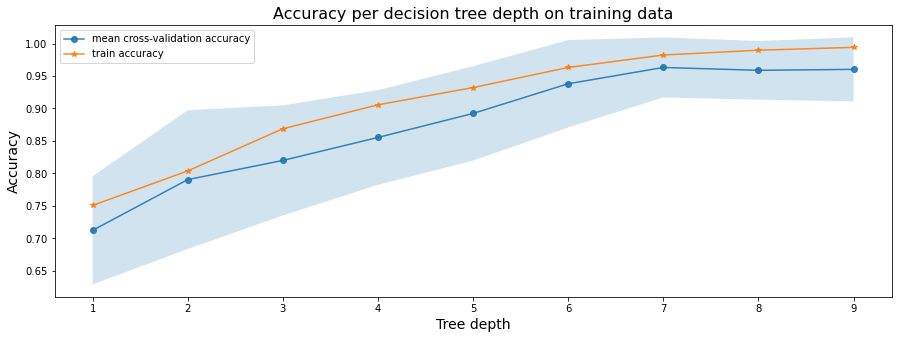

In [46]:
# function for fitting trees of various depths on the training data using cross-validation (K-fold)
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,10)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')



In [47]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9794


In [48]:
# print the scores on training and test set
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en


array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [49]:
# compare the train-set and test-set accuracy to check for overfitting.
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9956


In [50]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))
# We can see that the training-set score and test-set score is same as above. The training-set accuracy score is0.9956 while the test-set accuracy to be 0.9794. These two values are quite comparable. So, there is no sign of overfitting.

Training set score: 0.9956
Test set score: 0.9794


## Visualize decision-trees

In [51]:
plt.figure(figsize=(30,8))
tree.plot_tree(clf_en.fit(X_train, y_train)) 

[Text(902.6470588235293, 413.13599999999997, 'X[11] <= 0.5\nentropy = 1.0\nsamples = 678\nvalue = [332, 346]'),
 Text(541.5882352941176, 369.648, 'X[12] <= 2.5\nentropy = 0.843\nsamples = 387\nvalue = [105, 282]'),
 Text(361.0588235294117, 326.15999999999997, 'X[7] <= 160.5\nentropy = 0.496\nsamples = 267\nvalue = [29, 238]'),
 Text(262.5882352941176, 282.672, 'X[9] <= 2.7\nentropy = 0.743\nsamples = 128\nvalue = [27, 101]'),
 Text(164.1176470588235, 239.184, 'X[4] <= 241.0\nentropy = 0.604\nsamples = 115\nvalue = [17, 98]'),
 Text(65.6470588235294, 195.696, 'X[8] <= 0.5\nentropy = 0.119\nsamples = 62\nvalue = [1, 61]'),
 Text(32.8235294117647, 152.20799999999997, 'entropy = 0.0\nsamples = 51\nvalue = [0, 51]'),
 Text(98.47058823529412, 152.20799999999997, 'X[9] <= 0.1\nentropy = 0.439\nsamples = 11\nvalue = [1, 10]'),
 Text(65.6470588235294, 108.72000000000003, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(131.2941176470588, 108.72000000000003, 'entropy = 0.0\nsamples = 10\nval

Confusion matrix for Decision Tree
 [[135   0]
 [  6 150]]
 accuracy_Decision Tree: 0.979
 precision Decision Tree: 0.979


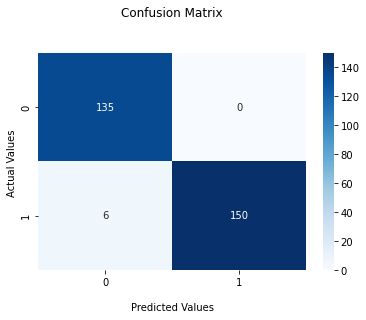

In [ ]:
# Perhitungan Confusion matrix
cm = confusion_matrix(y_test, y_pred_en)
accuracy = accuracy_score(y_test,y_pred_en)
precision =precision_score(y_test, y_pred_en,average='micro')

print('Confusion matrix for Decision Tree\n',cm)
print('accuracy Decision Tree: %.3f'%accuracy)
print('precision Decision Tree: %.3f'%precision)

ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Daftar pustaka
https://towardsdatascience.com/how-to-find-decision-tree-depth-via-cross-validation-2bf143f0f3d6

https://www.kaggle.com/code/hamelg/python-for-data-29-decision-trees/notebook

https://www.kaggle.com/code/satishgunjal/tutorial-k-fold-cross-validation/notebook

https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial

https://www.kaggle.com/code/satishgunjal/tutorial-k-fold-cross-validation/notebook#K-Fold-Cross-Validation-